# ERNIE-Vil prob

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
ES365072 = pd.read_csv("ES365072_test_unseen_SA.csv")

In [40]:
test_unseenv = pd.read_json("test_unseen.jsonl", lines = True)

## Basic metrics

In [6]:
sum(ES365072['label'] == 0)

2000

<AxesSubplot:xlabel='label', ylabel='count'>

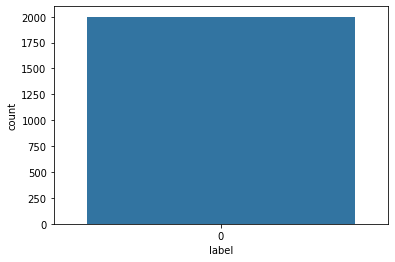

In [14]:
sns.countplot(x="label", data=ES365072)

In [22]:
sum(ES365072['proba'] > -1)

684

In [81]:
results = []
for i in range(len(ES365072['proba'])):
    if ES365072['proba'][i] > 0:
        results.append(1)
    else:
        results.append(0)

In [83]:
results = pd.DataFrame(results)

In [84]:
sum(results[0] == 1)

606

In [85]:
sum(test_unseenv['label'] == results[0])/2000

0.752

In [91]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_unseenv['label'], results[0],  pos_label=1)
metrics.auc(fpr, tpr)

0.7162666666666666

In [92]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_unseenv['label'], ES365072['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

0.8073365333333334